In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
parking = pd.read_excel('parking.xlsx')

In [10]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [11]:
parking.tail()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED
9059,LAS VEGAS,NV,ACTIVE,BUILDING,7,LEASED


In [12]:
parking['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [13]:
parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [14]:
parking.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

# 1. What is the distribution of values for owned/leased?

<BarContainer object of 9060 artists>

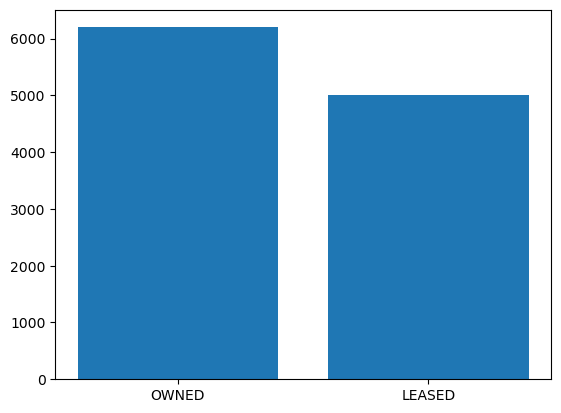

In [15]:
plt.bar(parking['Owned/Leased'],parking['Total Parking Spaces'])

In [18]:
owned_leased = pd.pivot_table(parking,index = 'Owned/Leased', values='Total Parking Spaces', aggfunc='count')

In [19]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


In [20]:
owned_leased = pd.pivot_table(parking,index = 'Owned/Leased', values='Total Parking Spaces', aggfunc='sum')

In [21]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,310269
OWNED,158210


<Axes: xlabel='Owned/Leased'>

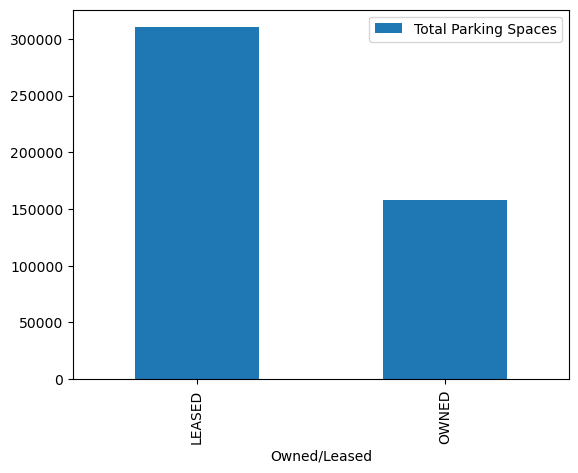

In [22]:
owned_leased.plot(kind='bar')

<BarContainer object of 2 artists>

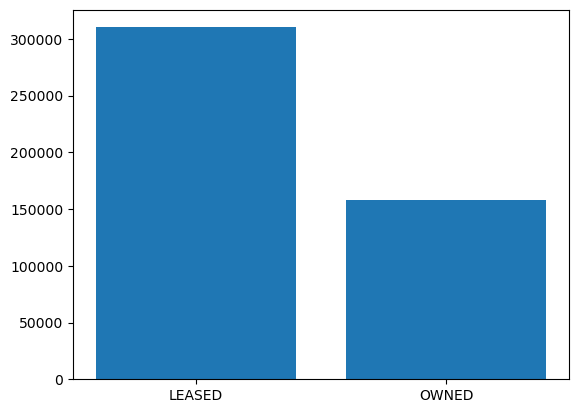

In [24]:
plt.bar(owned_leased.index,owned_leased['Total Parking Spaces'])

# 2. In which Building State is the parking situation in excess?

In [25]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [26]:
excess_parking = pd.pivot_table(parking, index='Bldg State',columns='Bldg Status',values='Total Parking Spaces')

In [28]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [30]:
excess_parking = excess_parking[excess_parking.EXCESS > 0]

In [32]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


<Axes: xlabel='Bldg State'>

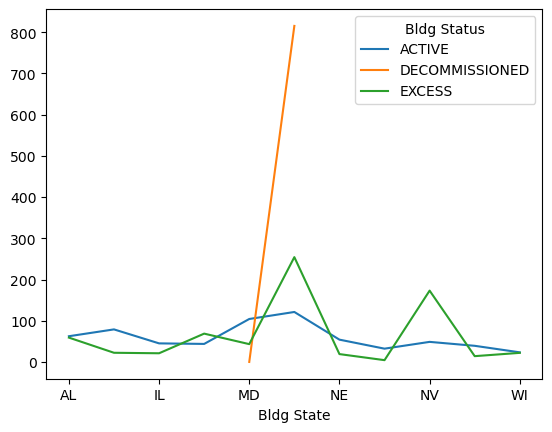

In [34]:
excess_parking.plot()

<Axes: xlabel='Bldg State'>

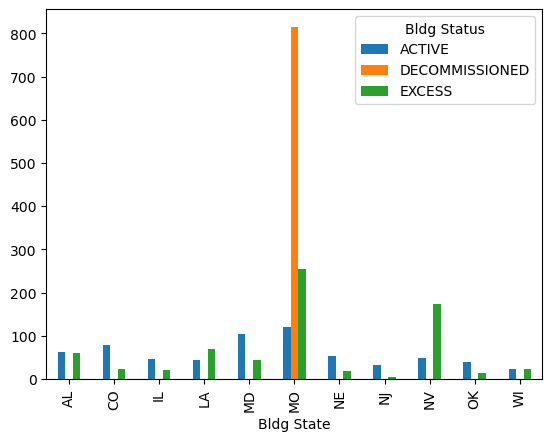

In [35]:
excess_parking.plot(kind='bar')

<BarContainer object of 11 artists>

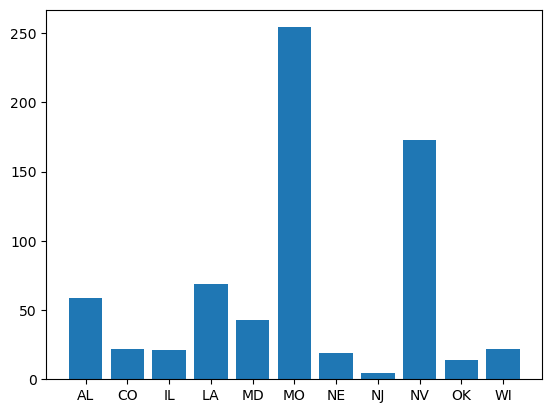

In [36]:
plt.bar(excess_parking.index,excess_parking.EXCESS)

In [41]:
excess_parking_sorted = excess_parking.EXCESS.sort_values(ascending = False)

In [39]:
excess_parking_sorted

Bldg State
NJ      4.300000
OK     14.000000
NE     19.000000
IL     21.000000
WI     22.000000
CO     22.200000
MD     43.166667
AL     59.000000
LA     68.666667
NV    173.000000
MO    254.272727
Name: EXCESS, dtype: float64

<BarContainer object of 11 artists>

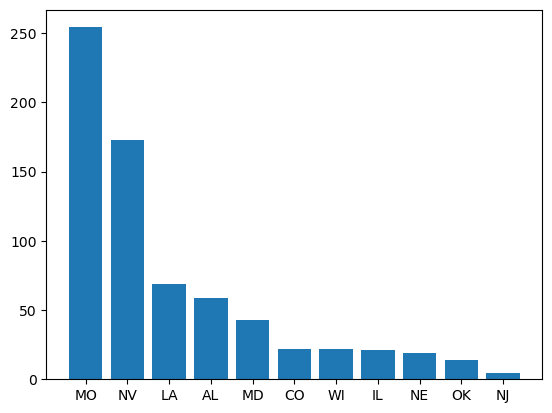

In [42]:
plt.bar(excess_parking_sorted.index,excess_parking_sorted.values)

# 3. Building Cities that have been decommissioned, along with total parking:

In [43]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [44]:
decom_parking_city = parking[parking['Bldg Status'] == 'DECOMMISSIONED']

In [45]:
decom_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


# 4. In which type of property are parking spaces in excess?

In [46]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [47]:
excess_parking_property = pd.pivot_table(parking[parking['Bldg Status']=='EXCESS'],index = 'Property Type',values='Total Parking Spaces')

In [48]:
excess_parking_property

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


# 5. Where is there more active parking? - Owned & Leased

In [49]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [53]:
active_parking = pd.pivot_table(parking[parking['Bldg Status']=='ACTIVE'], index='Owned/Leased',values = 'Total Parking Spaces')

In [54]:
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


In [55]:
active_parking.sum()

Total Parking Spaces    119.073346
dtype: float64

In [56]:
active_parking['Total Parking Spaces'] / active_parking['Total Parking Spaces'].sum()

Owned/Leased
LEASED    0.375461
OWNED     0.624539
Name: Total Parking Spaces, dtype: float64

In [58]:
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


In [59]:
active_parking['%Contri'] = active_parking['Total Parking Spaces'] / active_parking['Total Parking Spaces'].sum()

In [60]:
active_parking

,Total Parking Spaces,%Contri
Owned/Leased,,
LEASED,44.707349,0.375461
OWNED,74.365997,0.624539


# 6. States with more leased parking

In [61]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [62]:
state_leased_parking = pd.pivot_table(parking[parking['Owned/Leased']=='LEASED'],index = 'Bldg State',values = 'Total Parking Spaces')

In [64]:
state_leased_parking.sort_values('Total Parking Spaces',ascending=False)

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882
GA,62.425414
CO,58.647727
VT,56.128205
NM,51.926316


In [65]:
state_leased_parking.head()

,Total Parking Spaces
Bldg State,
AL,64.055556
AR,28.098592
AZ,38.025806
CA,44.639810
CO,58.647727


# 7. Which Property Type has more Active Parking?

In [68]:
# Remove leading and trailing whitespaces from column names
active_parking.columns = active_parking.columns.str.strip()

# Group the data by 'Property Type' and sum the 'Active Parking' values
property_type_parking = active_parking.groupby('Property Type')['Total Parking Spaces'].sum()

# Get the property type with the highest active parking count
max_property_type = property_type_parking.idxmax()

print("Property Type with the most Active Parking:", max_property_type)

Property Type with the most Active Parking: BUILDING


# 8. How's the distribution of parking in cities, by property type?

In [71]:
# Group the data by 'City' and 'Property Type' and sum the 'Total Parking Spaces'
parking_distribution = active_parking.groupby(['Bldg City', 'Property Type'])['Total Parking Spaces'].sum()

# Print the distribution of parking in the city by property type
print("Distribution of parking in the city by property type:")
print(parking_distribution)

Distribution of parking in the city by property type:
Bldg City     Property Type
ABERDEEN      BUILDING         395
ABILENE       BUILDING          80
ABINGDON      BUILDING          38
ACCOMAC       BUILDING          25
ADA           BUILDING          40
                              ... 
YUCCA VALLEY  BUILDING          24
YUMA          BUILDING         299
ZANESVILLE    BUILDING          75
ZEPHYRHILLS   LAND               0
ZUNI          BUILDING          30
Name: Total Parking Spaces, Length: 2070, dtype: int64


In [95]:
# Convert parking_distribution Series to DataFrame
parking_distribution = parking_distribution.reset_index()

# Check the column names in the parking_distribution DataFrame
print(parking_distribution_df.columns)

Index(['Bldg City', 'Property Type', 'Total Parking Spaces'], dtype='object')


In [98]:
print("Distribution of parking in the city by property type:")
parking_distribution_sorted = parking_distribution.groupby(['Bldg City', 'Property Type'])['Total Parking Spaces'].sum().reset_index()
parking_distribution_sorted = parking_distribution_sorted.sort_values('Total Parking Spaces', ascending=False)
parking_distribution_sorted.head(30)

Distribution of parking in the city by property type:


,Bldg City,Property Type,Total Parking Spaces
1943,WASHINGTON,BUILDING,17707
899,KANSAS CITY,BUILDING,16329
2043,WOODLAWN,BUILDING,13247
955,LAKEWOOD,BUILDING,10831
1628,SAN DIEGO,BUILDING,9334
82,AUSTIN,BUILDING,7443
74,ATLANTA,BUILDING,7245
945,LAGUNA NIGUEL,BUILDING,6198
1608,SAINT LOUIS,BUILDING,5945
1330,OGDEN,BUILDING,5287


In [97]:
print("Distribution of parking in the city by property type:")
parking_distribution.tail(10)

Distribution of parking in the city by property type:


,Bldg City,Property Type,Total Parking Spaces
2060,YORK,BUILDING,12
2061,YORKTOWN,BUILDING,0
2062,YOUNGSTOWN,BUILDING,270
2063,YREKA,BUILDING,8
2064,YUBA CITY,BUILDING,2
2065,YUCCA VALLEY,BUILDING,24
2066,YUMA,BUILDING,299
2067,ZANESVILLE,BUILDING,75
2068,ZEPHYRHILLS,LAND,0
2069,ZUNI,BUILDING,30


# 9. Building States that have 0 parking spaces

In [103]:
# Step 1: Filter the DataFrame to include rows with 0 parking spaces
zero_parking_states = parking[parking['Total Parking Spaces'] == 0]

# Step 2: Group by 'Bldg State'
zero_parking_states_grouped = zero_parking_states.groupby('Bldg State')

# Step 3: Count the occurrences of each 'Bldg State' in the filtered DataFrame
states_with_zero_parking = zero_parking_states_grouped.size()

# Step 4: Print the states with 0 parking spaces
print("Building States with 0 parking spaces:")
states_with_zero_parking

Building States with 0 parking spaces:


Bldg State
AL     32
AR      5
AZ     68
CA    121
CO     57
CT      7
DC    349
DE     14
FL     68
GA     42
IA      9
ID     22
IL     48
IN     52
KS     15
KY     34
LA     21
MA     25
MD    222
ME     34
MI     58
MN     24
MO     47
MS     19
MT     53
NC     50
ND     31
NE     10
NH      8
NJ     55
NM     42
NV      7
NY    150
OH     33
OK     38
OR     28
PA    111
RI      5
SC     19
SD      6
TN     30
TX    404
UT     18
VA    180
VT     27
WA     71
WI     18
WV     37
WY     17
dtype: int64

In [105]:
states_with_zero_parking.head(10)

Bldg State
AL     32
AR      5
AZ     68
CA    121
CO     57
CT      7
DC    349
DE     14
FL     68
GA     42
dtype: int64

In [106]:
states_with_zero_parking.tail(10)

Bldg State
SD      6
TN     30
TX    404
UT     18
VA    180
VT     27
WA     71
WI     18
WV     37
WY     17
dtype: int64

# 10. What states have the most and least parking spaces?

In [108]:
# Step 1: Group by 'Bldg State'
parking_spaces_by_state = parking.groupby('Bldg State')

# Step 2: Calculate the sum of 'Total Parking Spaces' for each state
state_parking_totals = parking_spaces_by_state['Total Parking Spaces'].sum()

# Step 3: Find the states with the maximum and minimum parking spaces
state_with_maximum_parking = state_parking_totals.idxmax()
state_with_minimum_parking = state_parking_totals.idxmin()

# Print the results
print("State with the maximum parking spaces:", state_with_maximum_parking)
print("State with the minimum parking spaces:", state_with_minimum_parking)

State with the maximum parking spaces: TX
State with the minimum parking spaces: DE
